In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [172]:
df = pd.read_csv('medical_examination.csv')

In [173]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [174]:
df['overweight'] = (df['weight'] / ((df['height']/100)**2))
df.loc[df['overweight'] <= 25 , 'overweight'] = 0
df.loc[df['overweight'] > 25 , 'overweight'] = 1
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.0


In [175]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [176]:
df_cat = pd.melt(df,id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0.0
1,1,cholesterol,1.0
2,1,cholesterol,1.0
3,1,cholesterol,0.0
4,0,cholesterol,0.0
...,...,...,...
419995,0,overweight,1.0
419996,1,overweight,1.0
419997,1,overweight,1.0
419998,1,overweight,1.0


In [177]:
df_cat = df_cat.groupby(['cardio','variable','value'])['value'].count().to_frame()
df_cat.rename(columns = {'value' : 'total'}, inplace = True)
df_cat.reset_index(inplace = True)
df_cat

,cardio,variable,value,total
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,15915
9,0,overweight,1.0,19106


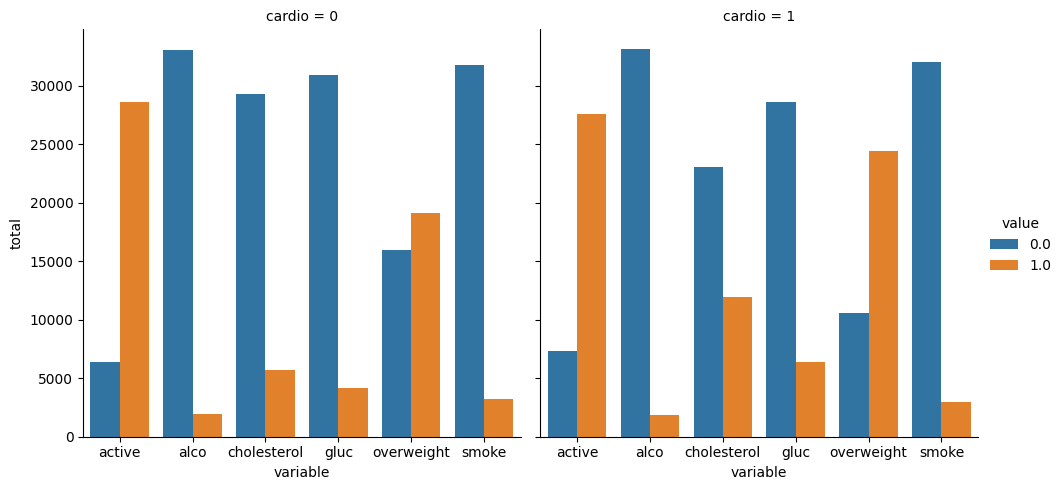

In [178]:
graph = sns.catplot(x = 'variable', y = 'total', hue = 'value', col = 'cardio', data = df_cat, kind = 'bar')

In [179]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [180]:
df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) &
                (df['height'] >= df['height'].quantile(0.025)) &
                (df['height'] <= df['height'].quantile(0.975)) &
                (df['weight'] >= df['weight'].quantile(0.025)) &
                (df['weight'] <= df['weight'].quantile(0.975))]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0.0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [181]:
corr = round(df_heat.corr(),1)
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.3,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.0,0.1,0.1,0.3,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.2,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.2,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


In [182]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'sex'),
 Text(3.5, 0, 'height'),
 Text(4.5, 0, 'weight'),
 Text(5.5, 0, 'ap_hi'),
 Text(6.5, 0, 'ap_lo'),
 Text(7.5, 0, 'cholesterol'),
 Text(8.5, 0, 'gluc'),
 Text(9.5, 0, 'smoke'),
 Text(10.5, 0, 'alco'),
 Text(11.5, 0, 'active'),
 Text(12.5, 0, 'cardio'),
 Text(13.5, 0, 'overweight')]

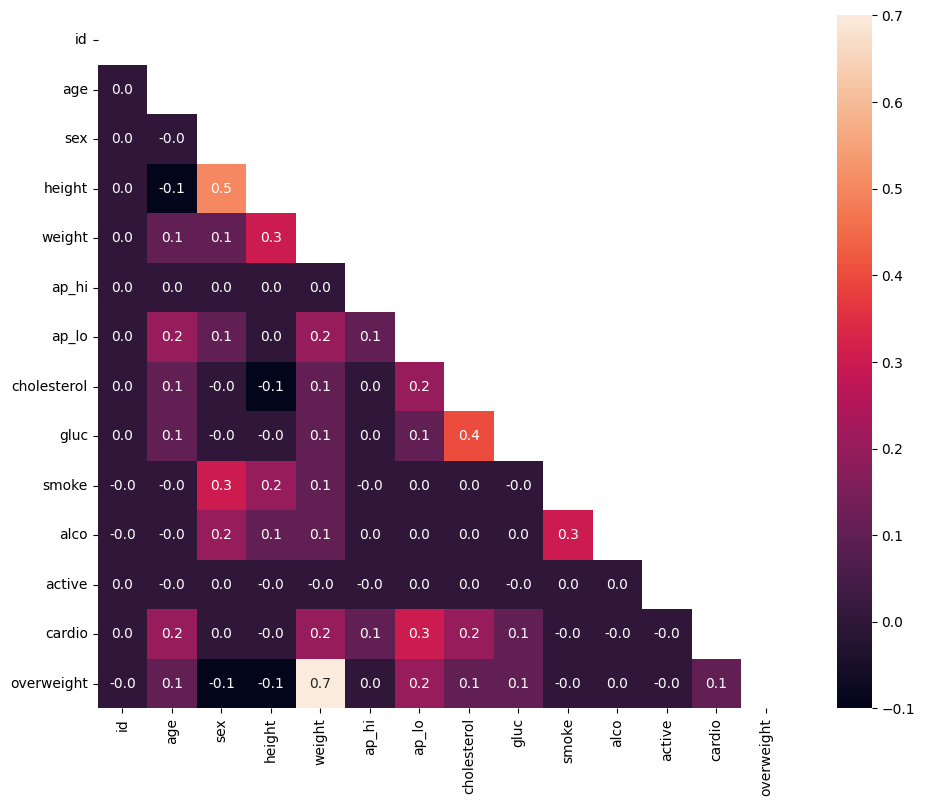

In [183]:
fig, ax = plt.subplots(figsize=(12, 9))
heat_map = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", square=True)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=90)